In [29]:
#!/bin/bash
!curl -L -o /content/spotify-top-2000s-mega-dataset.zip\
  https://www.kaggle.com/api/v1/datasets/download/iamsumat/spotify-top-2000s-mega-dataset

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 67052  100 67052    0     0   296k      0 --:--:-- --:--:-- --:--:--  296k


In [30]:
!unzip /content/spotify-top-2000s-mega-dataset.zip

Archive:  /content/spotify-top-2000s-mega-dataset.zip
replace Spotify-2000.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('Spotify-2000.csv')
df

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,1990,Heartbreak Hotel,Elvis Presley,adult standards,1958,94,21,70,-12,11,72,128,84,7,63
1990,1991,Hound Dog,Elvis Presley,adult standards,1958,175,76,36,-8,76,95,136,73,6,69
1991,1992,Johnny B. Goode,Chuck Berry,blues rock,1959,168,80,53,-9,31,97,162,74,7,74
1992,1993,Take Five,The Dave Brubeck Quartet,bebop,1959,174,26,45,-13,7,60,324,54,4,65


Source:
Link:
https://www.kaggle.com/datasets/iamsumat/spotify-top-2000s-mega-dataset

| Column Name               | Description                                                                 |
|----------------------------|-----------------------------------------------------------------------------|
| ID                         | Index of the track                                                          |
| Title                      | Name of the Track                                                           |
| Artist                     | Name of the Artist                                                          |
| Top Genre                  | Genre of the track                                                          |
| Year                       | Release Year of the track                                                   |
| Beats per Minute (BPM)     | The tempo of the song                                                       |
| Energy                     | The energy of a song - the higher the value, the more energetic            |
| Danceability               | The higher the value, the easier it is to dance to this song               |
| Loudness                   | The higher the value, the louder the song                                   |
| Valence                    | The higher the value, the more positive mood for the song                  |
| Length                     | The duration of the song                                                    |
| Acoustic                   | The higher the value, the more acoustic the song                            |
| Speechiness                | The higher the value, the more spoken words the song contains             |
| Popularity                 | The higher the value, the more popular the song                             |


In [32]:

# Printing the number of instances and features in the dataset

print("Number of instances on the dataset:", df.shape[0]-1)
print("Number of features on the datatset:", df.shape[1])
print(len(df['Top Genre'].unique()))

Number of instances on the dataset: 1993
Number of features on the datatset: 15
149


In [33]:

# Summary of missing values by column
null_summary = df.isnull().sum().sort_values(ascending=False)

# Combine with percentage
null_percent = (df.isnull().mean() * 100).sort_values(ascending=False)

# Display together
null_report = pd.DataFrame({
    'Missing Values': null_summary,
    'Percentage (%)': null_percent
})
print(null_report)

                        Missing Values  Percentage (%)
Index                                0             0.0
Title                                0             0.0
Artist                               0             0.0
Top Genre                            0             0.0
Year                                 0             0.0
Beats Per Minute (BPM)               0             0.0
Energy                               0             0.0
Danceability                         0             0.0
Loudness (dB)                        0             0.0
Liveness                             0             0.0
Valence                              0             0.0
Length (Duration)                    0             0.0
Acousticness                         0             0.0
Speechiness                          0             0.0
Popularity                           0             0.0


In [34]:
# Count total duplicate rows
df.duplicated().sum()

np.int64(0)

In [35]:

# Types of features

df.dtypes

,0
Index,int64
Title,object
Artist,object
Top Genre,object
Year,int64
Beats Per Minute (BPM),int64
Energy,int64
Danceability,int64
Loudness (dB),int64
Liveness,int64


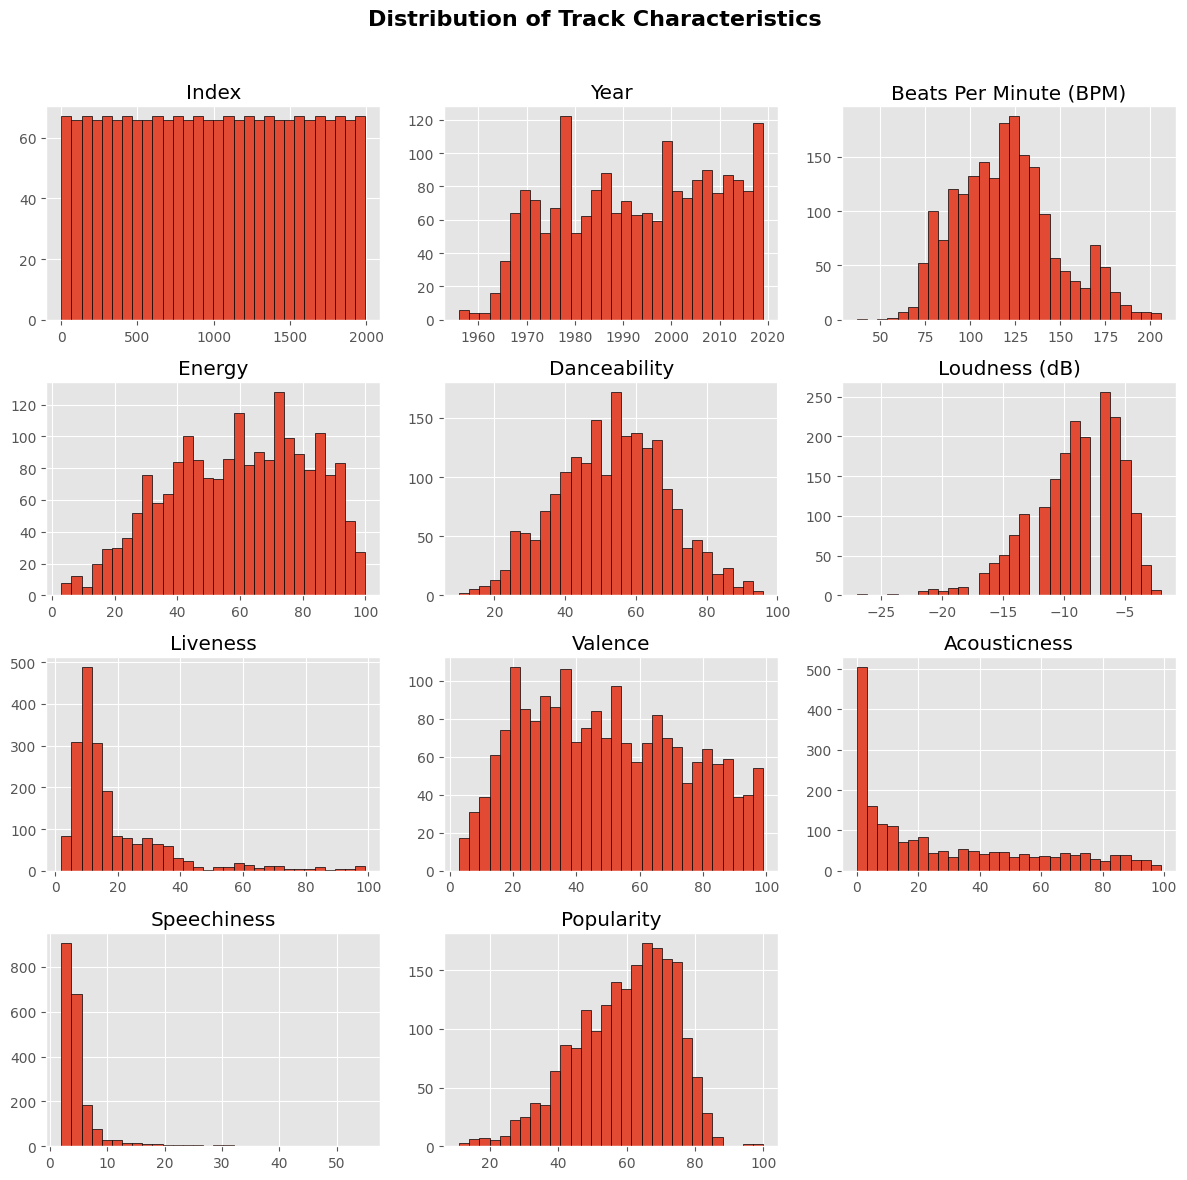

In [36]:

# Set a clean style
plt.style.use('ggplot')

# Plot histograms for all numerical columns
df.hist(figsize=(12, 12), bins=30, edgecolor='black')

# Add a main title for the figure
plt.suptitle("Distribution of Track Characteristics", fontsize=16, weight='bold')

# Adjust layout so titles and labels don't overlap
plt.tight_layout(rect=[0, 0, 1, 0.96])  # leave space for suptitle

# Show plot
plt.show()

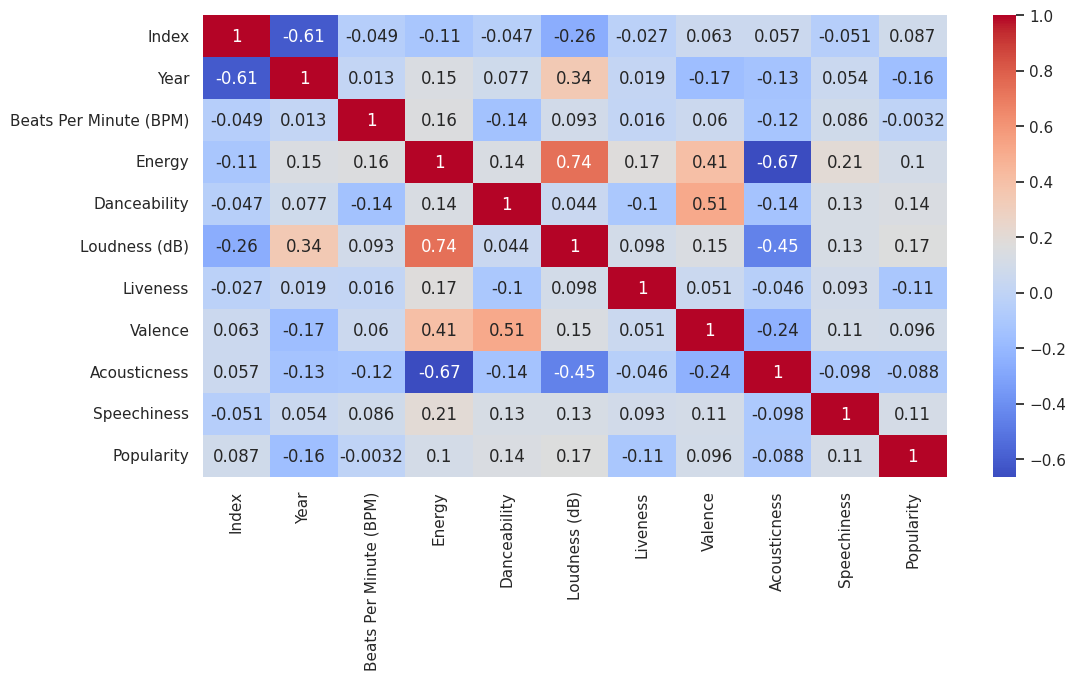

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.set_theme(style="white")
numeric_df = df.select_dtypes(include=['int64', 'float64'])
corr = numeric_df.corr()
heatmap = sns.heatmap(corr, cmap="coolwarm",annot=True)

/tmp/ipython-input-2368213309.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=lead_artists.values, y=lead_artists.index, palette="Blues", orient="h", edgecolor='black', ax=ax)


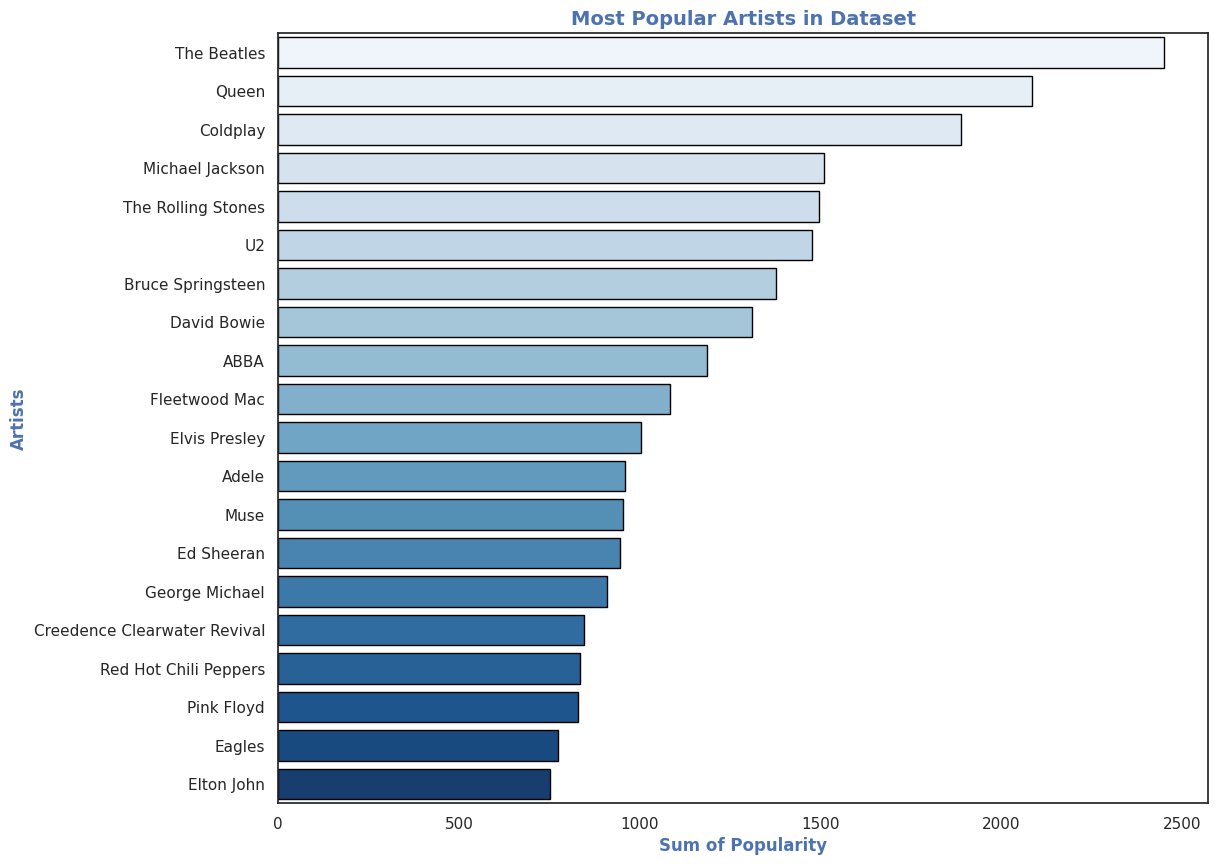

In [38]:
# Artists

fig, ax = plt.subplots(figsize = (12, 10))
lead_artists = df.groupby('Artist')['Popularity'].sum().sort_values(ascending=False).head(20)
ax = sns.barplot(x=lead_artists.values, y=lead_artists.index, palette="Blues", orient="h", edgecolor='black', ax=ax)
ax.set_xlabel('Sum of Popularity', c='b', fontsize=12, weight='bold')
ax.set_ylabel('Artists', c='b', fontsize=12, weight='bold')
ax.set_title('Most Popular Artists in Dataset', c='b', fontsize=14, weight = 'bold')
plt.show()

Text(0.5, 1.0, 'Popularity Distribution')

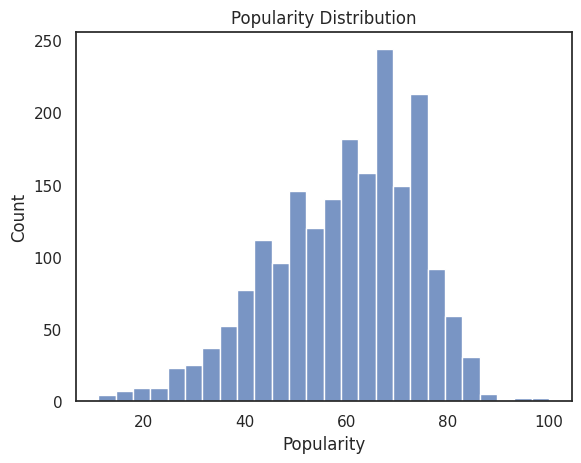

In [39]:

sns.histplot(df['Popularity']).set_title('Popularity Distribution')

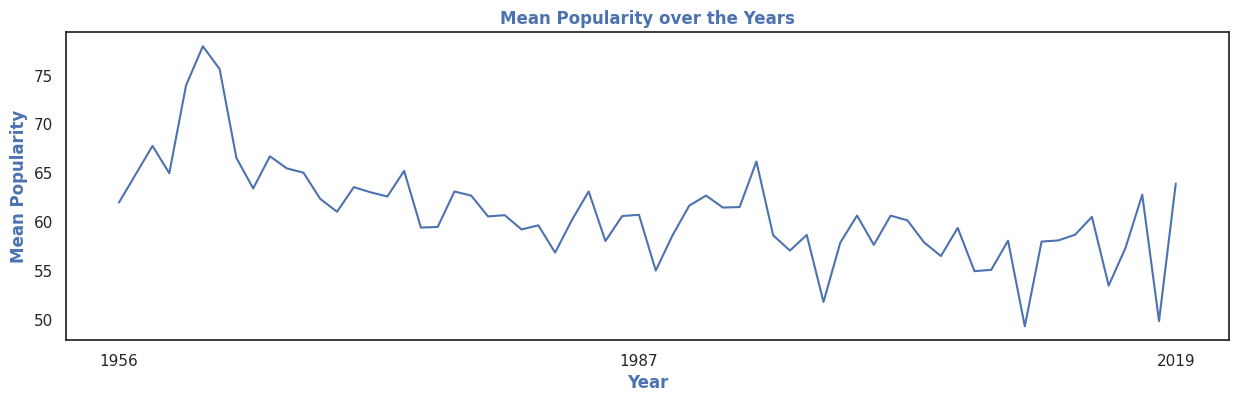

In [40]:
fig, ax = plt.subplots(figsize=(15, 4))

# Group and plot
ax = df.groupby('Year')['Popularity'].mean().plot()

# Titles and labels
ax.set_title('Mean Popularity over the Years', c='b', weight='bold')
ax.set_ylabel('Mean Popularity', c='b', weight='bold')
ax.set_xlabel('Year', c='b', weight='bold')

# Calculate year positions
min_year = df['Year'].min()
max_year = df['Year'].max()
mid_year = (min_year + max_year) // 2

# Set ticks to only these three years
ax.set_xticks([min_year, mid_year, max_year])

plt.show()


/tmp/ipython-input-3693665265.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_words.index, y=top_words.values, palette='mako')


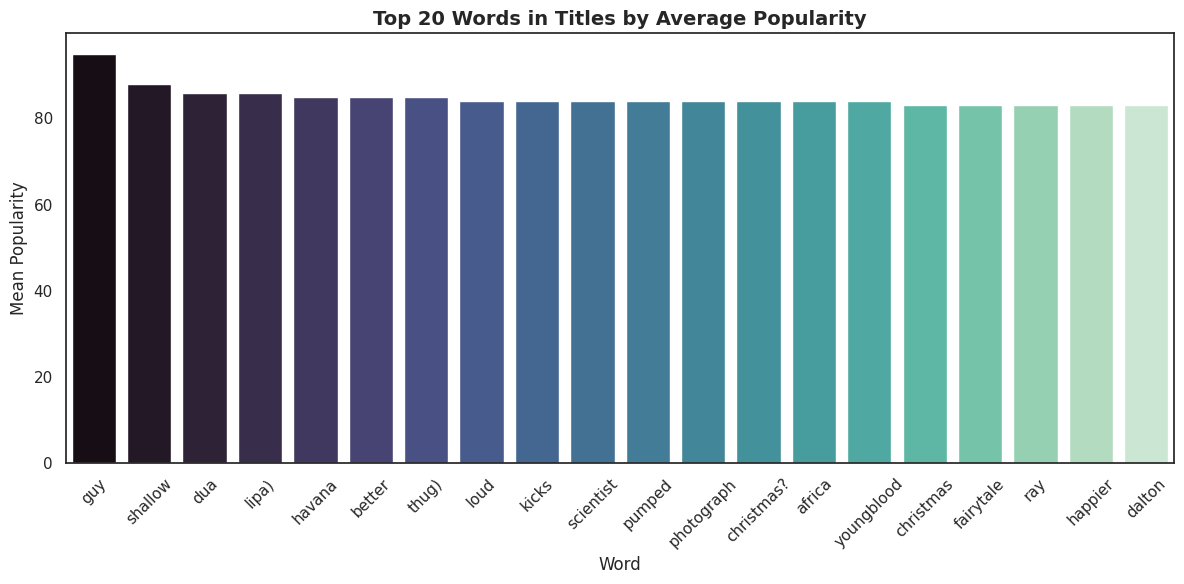

In [41]:

import matplotlib.pyplot as plt
import seaborn as sns

# =========================
# Songs containing which words are more popular?
# =========================
# Check if there's a column like "Title" or "Track Name"

# Identify title column
title_col = None
if 'Title' in df.columns:
    title_col = 'Title'
elif 'Track Name' in df.columns:
    title_col = 'Track Name'

if title_col:
    # Remove missing titles
    df = df.dropna(subset=[title_col, 'Popularity'])

    # Split titles into words
    df['Word'] = df[title_col].str.lower().str.split()
    all_words = df.explode('Word')

    # Calculate top 20 words by mean popularity
    top_words = all_words.groupby('Word')['Popularity'].mean().sort_values(ascending=False).head(20)

    if not top_words.empty:
        plt.figure(figsize=(12,6))
        sns.barplot(x=top_words.index, y=top_words.values, palette='mako')
        plt.title('Top 20 Words in Titles by Average Popularity', fontsize=14, weight='bold')
        plt.ylabel('Mean Popularity', fontsize=12)
        plt.xlabel('Word', fontsize=12)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    else:
        print("No words found after processing titles.")
else:
    print("No suitable title column found in dataset.")




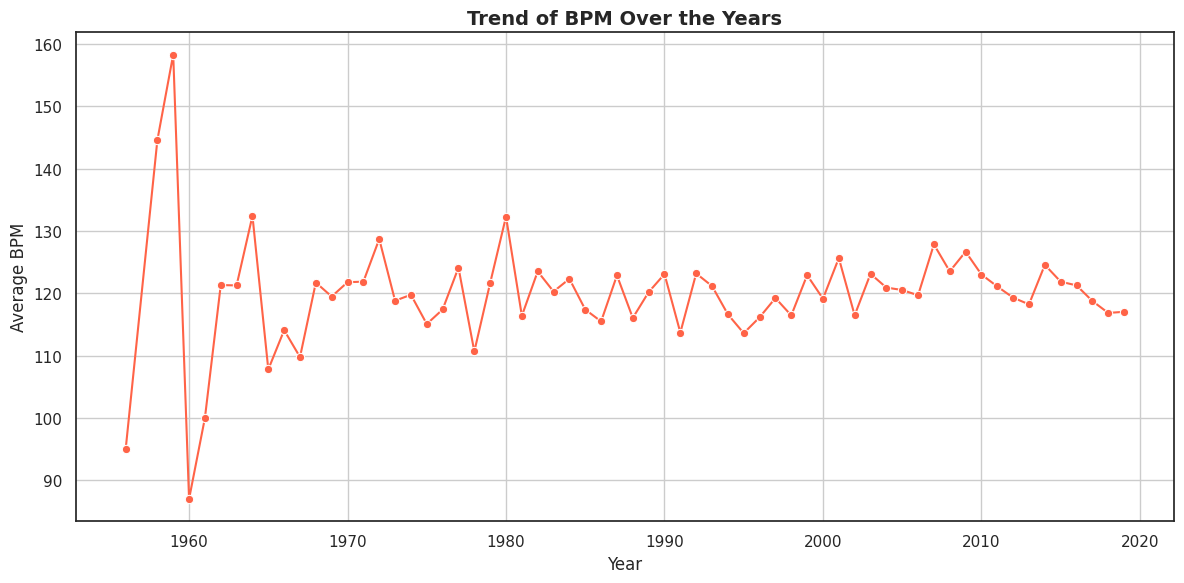

'\n\nbig spike after 1950 - mb fewer datapoints !AVG BPM is around  115–125 BPM, with recent years showing a gradual slowdown.\nX-axis (horizontal): Year (from around 1955 to 2020),Y-axis (vertical): Average BPM (Beats Per Minute) of songs released in that year'

In [42]:


# Replace infinite values with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN values if necessary
df.dropna(subset=['Year', 'Beats Per Minute (BPM)'], inplace=True)

# Calculate average BPM per year
bpm_trend = df.groupby('Year')['Beats Per Minute (BPM)'].mean()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=bpm_trend.index, y=bpm_trend.values, marker='o', color='tomato')
plt.title("Trend of BPM Over the Years", fontsize=14, weight='bold')
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average BPM", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

'''

big spike after 1950 - mb fewer datapoints !AVG BPM is around  115–125 BPM, with recent years showing a gradual slowdown.
X-axis (horizontal): Year (from around 1955 to 2020),Y-axis (vertical): Average BPM (Beats Per Minute) of songs released in that year'''

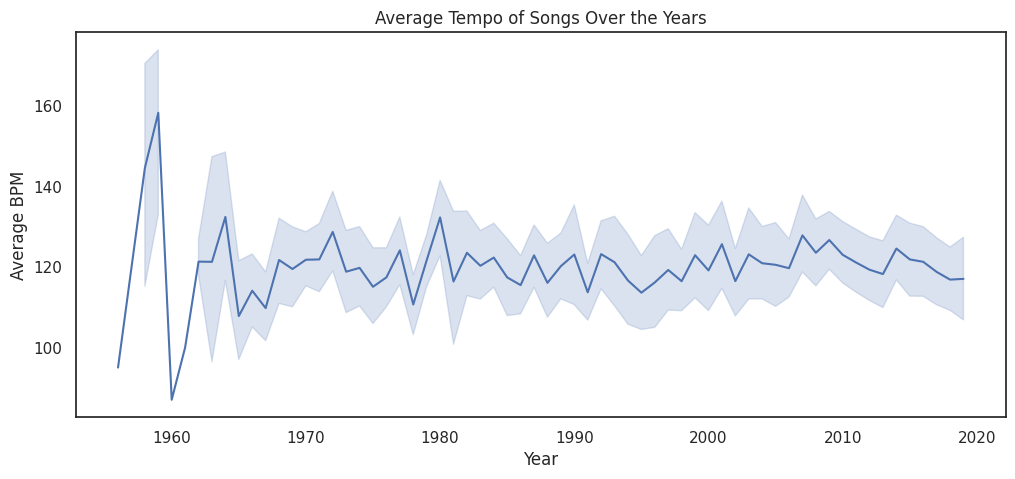

In [43]:
# =========================
#  What is the average tempo of songs compared over the years?
# =========================
plt.figure(figsize=(12,5))
sns.lineplot(data=df, x='Year', y='Beats Per Minute (BPM)', estimator='mean')
plt.title('Average Tempo of Songs Over the Years')
plt.ylabel('Average BPM')
plt.xlabel('Year')
plt.show()



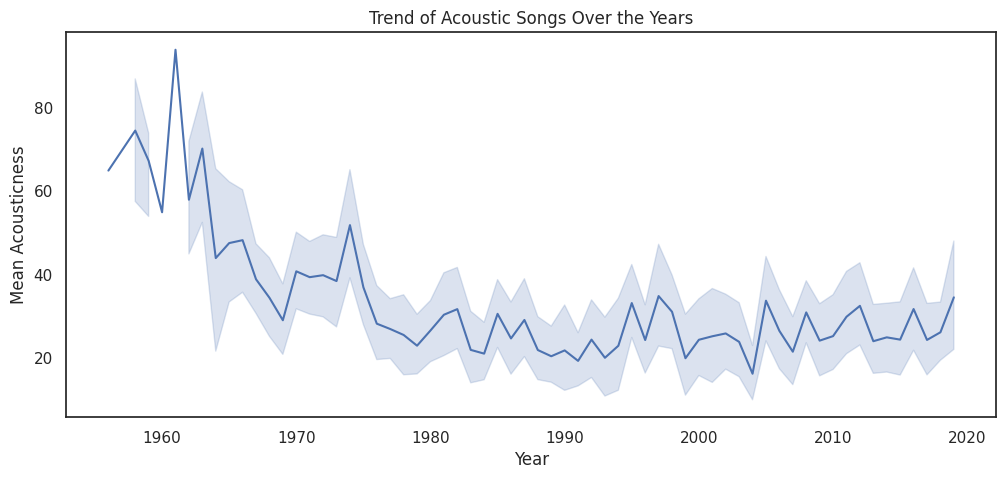

In [44]:
# =========================
# Is there a trend of acoustic songs being popular back in 1960s than now?
# =========================
if 'Acousticness' in df.columns:
    plt.figure(figsize=(12,5))
    sns.lineplot(data=df, x='Year', y='Acousticness', estimator='mean')
    plt.title('Trend of Acoustic Songs Over the Years')
    plt.ylabel('Mean Acousticness')
    plt.xlabel('Year')
    plt.show()


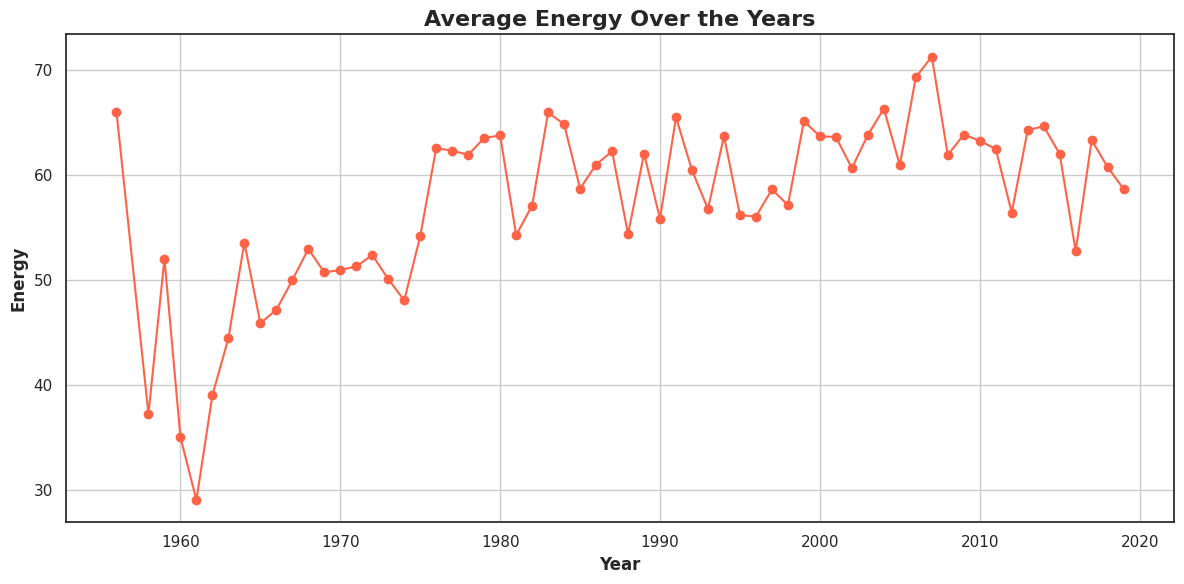

In [47]:
# Calculate average Energy per year
energy_trend = df.groupby('Year')['Energy'].mean()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(energy_trend.index, energy_trend.values, marker='o', color='tomato')

plt.title("Average Energy Over the Years", fontsize=16, weight='bold')
plt.xlabel("Year", fontsize=12, weight='bold')
plt.ylabel("Energy", fontsize=12, weight='bold')

plt.grid(True)
plt.tight_layout()
plt.show()
#Over the decades, popular songs have generally become more energetic compared to the early years

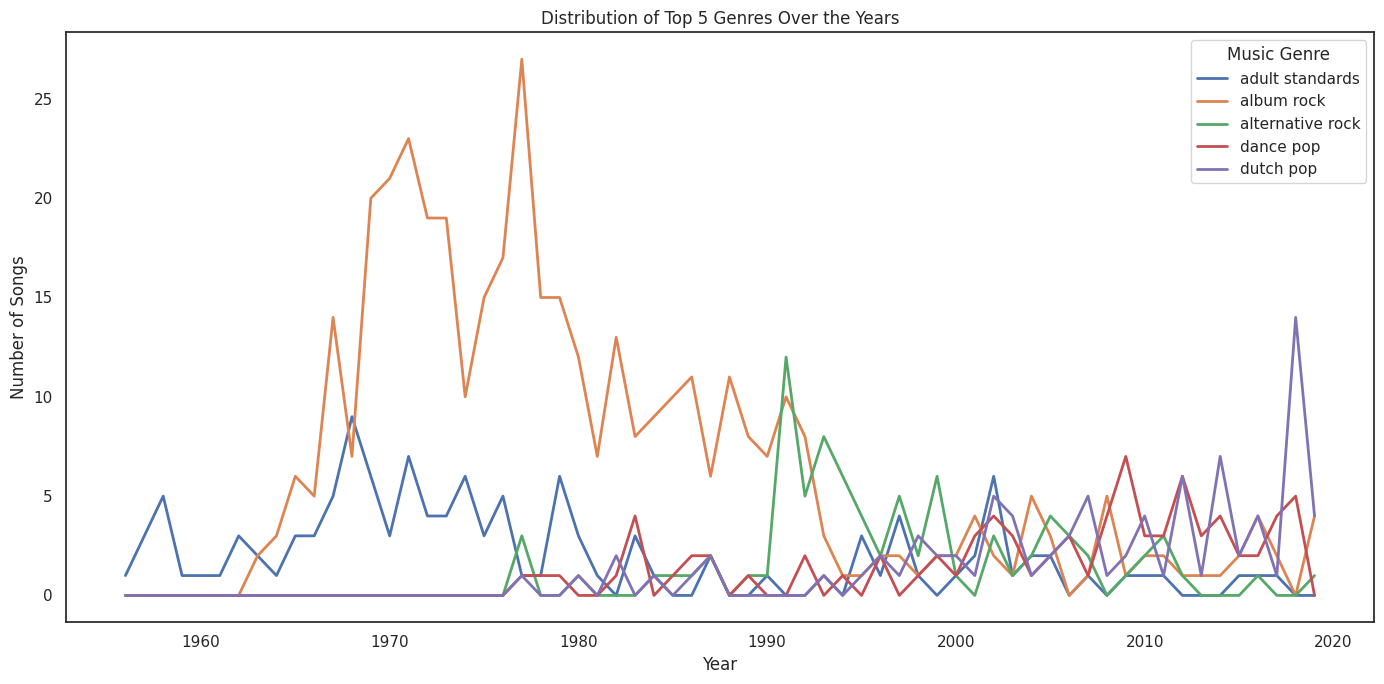

In [48]:
# Get the top 5 most common genres
top_5_genres = df['Top Genre'].value_counts().head(5).index.tolist()

# Filter the dataset to include only those genres
filtered = df[df['Top Genre'].isin(top_5_genres)]

# Create a pivot table showing song counts by Year and Genre
pivot = filtered.groupby(['Year', 'Top Genre']).size().unstack().fillna(0)

# Plot the trend of top 5 genres over the years
pivot.plot(figsize=(14, 7), linewidth=2)
plt.title("Distribution of Top 5 Genres Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Songs")
plt.legend(title="Music Genre")
plt.tight_layout()
plt.show()
#The dominance of genres has shifted dramatically over time: rock songs ruled the 1970s–1990s,Pop,dance genres have become more prominent in the 2000s

In conclusion, our project demonstrates how data analytics and machine learning can be used in the music industry for data driven decision making.